Install packages

In [ ]:
from pathlib import Path
import csv
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt

Let's explore .csv file

In [ ]:
datapath = Path.cwd().parent / "data"

In [ ]:
datapath

In [ ]:
datafile = datapath / "ESP_PUBLIC.IDENTITE_ARBRE.csv"

3.1 Lire les deux premières ligne du csv des arbres de Grenoble (module csv, voir doc officielle). Que représentent elles ?

In [ ]:
# Borrowed from https://www.geeksforgeeks.org/working-csv-files-python/
        
# initializing the titles and rows list 
fields = [] 
rows = [] 
  
# reading csv file 
with open(datafile, 'r') as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
      
    # extracting field names through first row 
    fields = next(csvreader) 
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 
  
    # get total number of rows 
    print(f"Total no. of rows: {csvreader.line_num}")
    
# printing the field names 
print(f'Field names are: {[field for field in fields]}') 
  
#  printing first 2 rows 
print('\nFirst 2 rows are:\n') 
for row in rows[:2]:
    # parsing each column of a row 
    for col in row: 
#         print("%10s"%col),
        print(f"{col}"),
    print('\n') 

3.2 Extraire l’information concernant l’année de plantation pour l’ensemble des lignes (rows) et stocker ces informations dans une variable de type List :
Solution avec Dictionnaire

In [ ]:
# iterate over each line as a ordered dictionary and print only few column by column name 
cropping_date = []
csv_list = []
with open(datafile, 'r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    for row in csv_dict_reader:
        cropping_date.append(row['ANNEEDEPLANTATION'])
        csv_list.append(row)
    
print(csv_list[0])

In [ ]:
row['ANNEEDEPLANTATION']

In [ ]:
# iterate over each line as a ordered dictionary and print only few column by column name 
with open(datafile, 'r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    cropping_date = [row['ANNEEDEPLANTATION'] for row in csv_dict_reader]

Afficher les 50 premières lignes et les 50 dernières lignes de cette liste

In [ ]:
print(cropping_date[0:49])

In [ ]:
print(cropping_date[-49:])

3.3 Pour combien d’arbres manque-t-il l’information concernant la date de plantation ?

In [ ]:
len(cropping_date)

In [ ]:
cropping_date[3542] == ''

Using for loop

In [ ]:
count = 0
for date in cropping_date:
    if date == '':
        count += 1

In [ ]:
print(f"Number of missing values is {count}")

Using count function

In [ ]:
print(f'Number of missing values is {cropping_date.count("")}')

3.4 Extraire l’ensemble des lignes (rows) et stocker ces informations dans une variable de type List

In [ ]:
type(rows)

3.5 Combien d’arbres sont recensés dans ce jeu de données ? 

In [ ]:
# iterate over each line as a ordered dictionary and print only few column by column name 
with open(datafile, 'r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    cropping_date = [row['ANNEEDEPLANTATION'] for row in csv_dict_reader]
    
# Remove "" from cropping dates
while("" in cropping_date) : 
    cropping_date.remove("") 

In [ ]:
print(f'Number of trees is {len(cropping_date)}')

3.6 Combien d’arbres ont été plantés en moyenne chaque année ? 

First solution: using unique values with Set datatype

In [ ]:
unique_dates_list = list(set(cropping_date))
unique_dates_list

In [ ]:
len(unique_dates_list)

Second solution: using numpy array

In [ ]:
# function to get unique values 
def get_unique(list1): 
    x = np.array(list1) 
    return np.unique(x)
    
unique_dates = get_unique(cropping_date)
unique_dates

In [ ]:
print(f"Unique values from list are {unique_dates}")

Let's remove the empty string in the list

In [ ]:
# using remove() to perform removal 
while("" in unique_dates_list) : 
    unique_dates_list.remove("") 

In [ ]:
unique_dates_list

In [70]:
avg_trees_per_year = sum([cropping_date.count(date) for date in unique_dates_list]) / len(unique_dates_list)
avg_trees_per_year

502.0806451612903

In [52]:
print(f"the average number of cropped tree per year is {round(avg_trees_per_year)}")

the average number of cropped tree per year is 502


3.7 Afficher tous les arbres ayant été plantés l’année de votre naissance

In [ ]:
birth_year = '1986'
crop_birth_year = []
with open(datafile, 'r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    for row in csv_dict_reader:
        if row['ANNEEDEPLANTATION'] == birth_year:
            crop_birth_year.append(row)        

In [ ]:
len(crop_birth_year)

3.8 Combien d’arbres ont été plantés depuis votre naissance ?

In [ ]:
csv_dict_reader

In [ ]:
nb_trees_list = []
with open(datafile, 'r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    for row in csv_dict_reader:
        if row['ANNEEDEPLANTATION'] >= birth_year:
            nb_trees_list.append(row)

nb_trees_since_birth_year = len(nb_trees_list)
            
print(f"The number of trees cropped since {birth_year} is {nb_trees_since_birth_year}")

3.9 Quel Maire a planté le plus d’arbre à Grenoble ?

3.10 Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année. 

In [ ]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    
    return hist

In [ ]:
counted = count_elements(cropping_date)
counted

In [50]:
test = dict()
test['blop'] = 3
test

{'blop': 3}

3.11 Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année. 

In [ ]:
plt.figure(figsize=(100,50))
plt.bar(counted.keys(),counted.values(), color='g')

In [ ]:
cropping_date[0:10]

Text(0, 0.5, 'nb of trees')

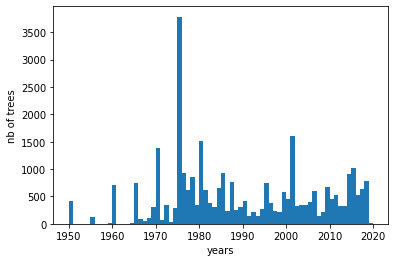

In [68]:
cropping_date_int = list(map(int, cropping_date))
plt.hist(cropping_date_int, bins = 70, range = (1950, 2020))
plt.xlabel("years")
plt.ylabel("nb of trees")

In [67]:
a = '23'
type(a)
b = int(a)
type(b)
a

'23'

3.12 Récupérez maintenant l’information concernant le genre botanique et la stocker conjointement avec l’année de plantation dans un tuple. Les tuples seront stockés dans une liste.

In [ ]:
genre_year_lst = []
for row in csv_list:
    genre_year_lst.append((row['ANNEEDEPLANTATION'] , row['GENRE_BOTA'] ))

In [ ]:
genre_year_lst[:10]

3.13 Pour combien d'arbres manque-t-il l’information concernant le genre botanique ? 

In [71]:
count = 0
for row_tuple in genre_year_lst:
    if '' in row_tuple:
        count += 1

In [72]:
count

804

3.14 Triez les tuples en fonction de l’année de plantation par ordre décroissant.

In [ ]:
# Function to sort the list of tuples by its second item 
def Sort_Tuple_bubble_sort(tup):  
      
    # getting length of list of tuples 
    lst = len(tup)  
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][0] > tup[j + 1][0]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup

In [ ]:
def Sort_Tuple_lambda(tup):  

    tup.sort(key = lambda x: x[0])  
    return tup  

In [ ]:
sorted_genre_year_lst = Sort_Tuple_lambda(genre_year_lst)

In [ ]:
sorted_genre_year_lst[2000:2010]